<a href="https://colab.research.google.com/github/lhfranca/Analise_Dados/blob/master/desmatamento_incendio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    ANO  MÊS       ESTADO   LATITUDE  LONGITUDE  INCÊNDIOS
0  1999  JAN     AMAZONAS  -2.371113 -59.899933          3
1  1999  JAN     MARANHAO  -2.257395 -45.487831         36
2  1999  JAN  MATO GROSSO -12.660633 -55.057989         18
3  1999  JAN         PARA  -2.474820 -48.546967         87
4  1999  JAN     RONDONIA -12.861700 -60.513100          1
      ANO  MÊS       ESTADO   LATITUDE  LONGITUDE  INCÊNDIOS
455  2004  JAN        AMAPA   0.131862 -51.642086         58
456  2004  JAN     AMAZONAS  -0.761964 -64.503152        277
457  2004  JAN     MARANHAO  -3.133702 -45.985558        242
458  2004  JAN  MATO GROSSO -12.428064 -55.528333        171
459  2004  JAN         PARA  -2.370078 -50.867593        875
      ANO  MÊS       ESTADO   LATITUDE  LONGITUDE  INCÊNDIOS
458  2004  JAN  MATO GROSSO -12.428064 -55.528333        171
467  2004  FEV  MATO GROSSO -12.654784 -55.526864        264
473  2004  MAR  MATO GROSSO -12.631334 -55.480692        506
482  2004  ABR  MATO GROSSO -12.5757

Text(0, 0.5, 'INCÊNDIOS')

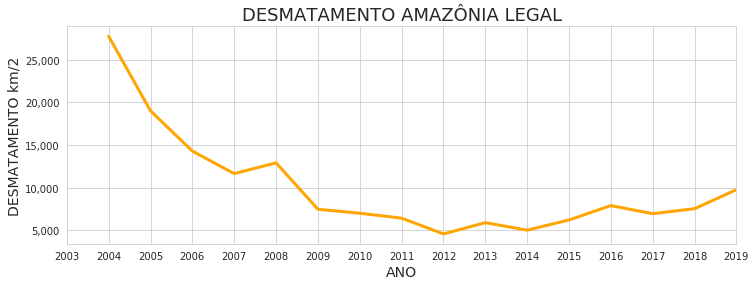

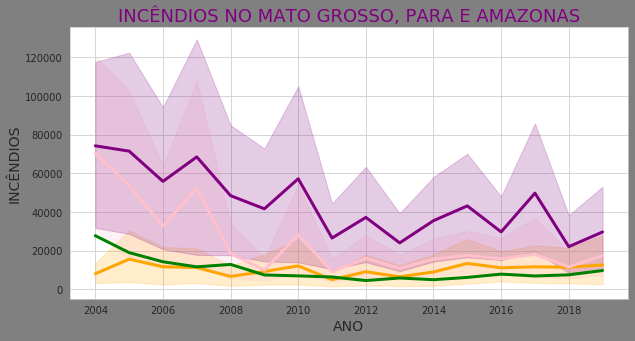

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium



df=pd.read_csv("def_area_2004_2019.csv")
df_fire= pd.read_csv("inpe_brazilian_amazon_fires_1999_2019.csv")
df.head(10)

#Essa parte é de um projeto que achei no kaggle
year_mo_state = df.groupby(by = ['Ano/Estados','AMZ LEGAL']).sum().reset_index()

sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(12,4))

ax = sns.lineplot(x = 'Ano/Estados', y = 'AMZ LEGAL', data = year_mo_state, estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None)

plt.title('DESMATAMENTO AMAZÔNIA LEGAL', fontsize = 18)
plt.xlabel('ANO', fontsize = 14)
plt.ylabel('DESMATAMENTO km/2', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(2003, 2019)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) 
#até aqui, não entendi muito.

#Trocando o número do mês pelo nome, tem como fazer de outro jeito?
df_fire.month.replace(1, 'JAN', inplace=True)
df_fire.month.replace(2, 'FEV', inplace=True)
df_fire.month.replace(3, 'MAR', inplace=True)
df_fire.month.replace(4, 'ABR', inplace=True)
df_fire.month.replace(5, 'MAI', inplace=True)
df_fire.month.replace(6, 'JUN', inplace=True)
df_fire.month.replace(7, 'JUL', inplace=True)
df_fire.month.replace(8, 'AGO', inplace=True)
df_fire.month.replace(9, 'SET', inplace=True)
df_fire.month.replace(10, 'OUT', inplace=True)
df_fire.month.replace(11, 'NOV', inplace=True)
df_fire.month.replace(12, 'DEZ', inplace=True)

#Removendo linhas antes de 2004
df_remove = df_fire.loc[(df_fire['year']) < 2004 ]
df_fire2 = df_fire.drop(df_remove.index)

#Traduzindo colunas do DataFrame
df_fire.rename(columns={'month': 'MÊS'}, inplace= True)
df_fire.rename(columns={'year': 'ANO'}, inplace= True)
df_fire.rename(columns={'state': 'ESTADO'}, inplace= True)
df_fire.rename(columns={'firespots': 'INCÊNDIOS'}, inplace= True)
df_fire.rename(columns={'latitude': 'LATITUDE'}, inplace= True)
df_fire.rename(columns={'longitude': 'LONGITUDE'}, inplace= True)

df_fire2.rename(columns={'month': 'MÊS'}, inplace= True)
df_fire2.rename(columns={'year': 'ANO'}, inplace= True)
df_fire2.rename(columns={'state': 'ESTADO'}, inplace= True)
df_fire2.rename(columns={'firespots': 'INCÊNDIOS'}, inplace= True)
df_fire2.rename(columns={'latitude': 'LATITUDE'}, inplace= True)
df_fire2.rename(columns={'longitude': 'LONGITUDE'}, inplace= True)


#Mesmo procedimento de excluir, é necessário?
df_remove = df_fire.loc[(df_fire['ANO']) < 2004 ]
df_fire2 = df_fire.drop(df_remove.index)

#Criando um "subDataFrame" apenas com os dados do Mato Grosso, Amazonas e Para
df_2 = df_fire2.loc[(df_fire2['ESTADO']) != 'MATO GROSSO' ]
df_fire_MT = df_fire2.drop(df_2.index)


df_3 = df_fire2.loc[(df_fire2['ESTADO']) != 'AMAZONAS' ]
df_fire_AM = df_fire2.drop(df_3.index)

df_4 = df_fire2.loc[(df_fire2['ESTADO']) != 'PARA' ]
df_fire_PA = df_fire2.drop(df_4.index)

AM= df_fire_AM ['ESTADO']
MT= df_fire_MT ['ESTADO']


print(df_fire.head(5))
print(df_fire2.head(5))
print (df_fire_MT.head(5))
print (df_fire_AM.head(5))
print (df_fire_PA.head(5))
print (df.head(5))

#Queria criar um gráfico para comparar os valores do MT e AM e PA

df2= df['AM'] + df['MT'] + df['PA']
print(df2)



plt.figure(figsize=(10,5), facecolor= 'grey')
sns.lineplot(x=df_fire_AM['ANO'], y=df_fire_AM['INCÊNDIOS'], estimator=sum, color = 'orange', lw= 3)
sns.lineplot(x=df_fire_MT['ANO'], y=df_fire_MT['INCÊNDIOS'], estimator=sum, color = 'pink', lw= 3)
sns.lineplot(x=df_fire_PA['ANO'], y=df_fire_PA['INCÊNDIOS'], estimator=sum, color = 'purple', lw= 3,)
sns.lineplot(x=df['Ano/Estados'], y=df['AMZ LEGAL'], estimator=sum, color = 'green', lw= 3,)
plt.title('INCÊNDIOS NO MATO GROSSO, PARA E AMAZONAS', fontsize = 18, color= 'purple')
plt.xlabel('ANO', fontsize = 14)
plt.ylabel('INCÊNDIOS', fontsize = 14)


